In [ ]:
pip install pyspark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pyspark - MLlib - recommendation
#### Reference: https://spark.apache.org/docs/latest/mllib-collaborative-filtering.html

In [ ]:
# SparkContext
from pyspark import SparkContext
sc = SparkContext("local", "MSML651")

In [ ]:
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating
import math
# reading data on pyspark
ratings = sc.textFile('/content/drive/MyDrive/651/ml-1m/ratings.dat').map(lambda x: x.split("::"))
ratings= ratings.map(lambda l:Rating(int(l[0]),int(l[1]),float(l[2])))
ratings_train, ratings_test= ratings.randomSplit([0.8, 0.2])

In [ ]:
def train_test_mf (ratings_train,ratings_test):
  result = []
  for param in range(1,21):
    rank = param
    numIterations = param    
    model = ALS.train(ratings_train, rank, numIterations)
    # Evaluate the model on testdata
    # dropping the ratings on the tests data
    testdata = ratings_test.map(lambda p: (p[0], p[1]))
    predictions = model.predictAll(testdata).map(lambda r: ((r[0], r[1]), r[2]))
    # joining the prediction with the original test dataset
    ratesAndPreds = ratings_test.map(lambda r: ((r[0], r[1]), r[2])).join(predictions)

    # calculating error
    MSE = ratesAndPreds.map(lambda r: ((r[1][0] - r[1][1])**2)).mean()
    print("Rank: %d ; Number of Iterations : %d ; Root Mean Squared Error(RMSE)= %.4f " %(rank, numIterations, math.sqrt(MSE)))
    test_set.append(((rank, numIterations) , math.sqrt(MSE)))

  return result

In [ ]:
# train and test the model 
result = train_test_mf(ratings_train,ratings_test)

Rank: 1 ; Number of Iterations : 1 ; Root Mean Squared Error(RMSE)= 3.6194 
Rank: 2 ; Number of Iterations : 2 ; Root Mean Squared Error(RMSE)= 1.0700 
Rank: 3 ; Number of Iterations : 3 ; Root Mean Squared Error(RMSE)= 0.8949 
Rank: 4 ; Number of Iterations : 4 ; Root Mean Squared Error(RMSE)= 0.8883 
Rank: 5 ; Number of Iterations : 5 ; Root Mean Squared Error(RMSE)= 0.8811 
Rank: 6 ; Number of Iterations : 6 ; Root Mean Squared Error(RMSE)= 0.8812 
Rank: 7 ; Number of Iterations : 7 ; Root Mean Squared Error(RMSE)= 0.8810 
Rank: 8 ; Number of Iterations : 8 ; Root Mean Squared Error(RMSE)= 0.8839 
Rank: 9 ; Number of Iterations : 9 ; Root Mean Squared Error(RMSE)= 0.8862 
Rank: 10 ; Number of Iterations : 10 ; Root Mean Squared Error(RMSE)= 0.8945 
Rank: 11 ; Number of Iterations : 11 ; Root Mean Squared Error(RMSE)= 0.8972 
Rank: 12 ; Number of Iterations : 12 ; Root Mean Squared Error(RMSE)= 0.9079 
Rank: 13 ; Number of Iterations : 13 ; Root Mean Squared Error(RMSE)= 0.9076 
Rank

In [ ]:
# deleteing the not relevant result 
# del result[0]

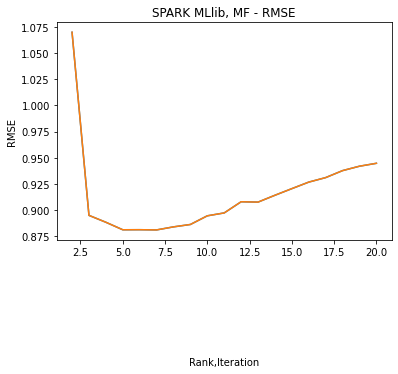

<Figure size 30000x10000 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
x_val = [x[0] for x in result]
y_val = [x[1] for x in result]

plt.plot(x_val,y_val)
plt.title('SPARK MLlib, MF - RMSE')
plt.ylabel('RMSE')
plt.xlabel('Rank,Iteration',labelpad=100)
plt.figure(figsize= (300,100), dpi= 100)
plt.show()